<a href="https://colab.research.google.com/github/silverstar0727/n_body_problem/blob/master/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20y 07m 20d

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation as an

from IPython.display import HTML

In [46]:
# Reference quantities
m_nd = 1.989e+30  # mass of sun                               [kg]
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri  [m]
v_nd = 30000  # Relative velocity of earth around the sun [m/s]
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri          [s]

# Constants
G = 6.67408e-10
K1 = G * t_nd * m_nd / ((r_nd ** 2) * v_nd)
K2 = v_nd * t_nd / r_nd

In [54]:
# initial condition
r_0 = np.array([[-1.5, 0.0, 0.0], [1.5, 0.0, 1.0], [0.0, 1.0, 0.0]]) # [m]
v_0 = np.array([[0.01, 0.01, 0.0], [0.01, 0.0, 0.01], [0.02, -0.01, 0.0]]) # [m/s]

r_0 = K1 * r_0
v_0 = K2 * v_0

m1 = 1.1 # [m]
m2 = 0.907
m3 = 1.0
m = [m1, m2, m3]

In [55]:
# constant
G = 6.6726e-11 # [Nm2/kg2]

![](https://upload.wikimedia.org/wikipedia/commons/b/bc/Spherical_coordinate.gif)

In [56]:
# 물체 1,2
def force12(r1, r2): # 물체 1과 2의 위치를 r1, r2의 직교좌표계 리스트로 받음
  F = np.zeros(3)
  r12 = np.zeros(3)

  r12[0] = r1[0] - r2[0]
  r12[1] = r1[1] - r2[1]
  r12[2] = r1[2] - r2[2]

  Fmag = G*m1*m2 / (np.linalg.norm(r12)**2) # 힘의크기
  theta = np.arcsin(r12[2] / np.linalg.norm(r12)) # theta
  pi = np.arctan(np.abs(r12[1]/np.abs(r12[0]))) # pi

  # Force
  F[0] = Fmag * np.cos(theta) * np.cos(pi) 
  F[1] = Fmag * np.cos(theta) * np.sin(pi)
  F[2] = Fmag * np.sin(theta)

  return F

def force23(r2, r3):
  F = np.zeros(3)
  r23 = np.zeros(3)
  
  r23[0] = r2[0] - r3[0]
  r23[1] = r2[1] - r3[1]
  r23[2] = r2[2] - r3[2]

  Fmag = G*m2*m3 / (np.linalg.norm(r23)**2)
  theta = np.arcsin(r23[2] / np.linalg.norm(r23))
  pi = np.arctan(np.abs(r23[1]/np.abs(r23[0])))

  F[0] = Fmag * np.cos(theta) * np.cos(pi)
  F[1] = Fmag * np.cos(theta) * np.sin(pi)
  F[2] = Fmag * np.sin(theta)

  return F

def force13(r1, r3):
  F = np.zeros(3)
  r13 = np.zeros(3)
  
  r13[0] = r1[0] - r3[0]
  r13[1] = r1[1] - r3[1]
  r13[2] = r1[2] - r3[2]

  Fmag = G*m1*m3 / (np.linalg.norm(r13)**2)
  theta = np.arcsin(r13[2] / np.linalg.norm(r13))
  pi = np.arctan(np.abs(r13[1]/np.abs(r13[0])))

  F[0] = Fmag * np.cos(theta) * np.cos(pi)
  F[1] = Fmag * np.cos(theta) * np.sin(pi)
  F[2] = Fmag * np.sin(theta)

  return F

# 타겟 물체에 대한 net force
def force(object_num, r0):
  # 타겟 물체를 각각 1,2,3의 정수로 object_num인자에 받고, 초기위치를 직교좌표계로 r_0에 3x3개 좌표로받음
  if object_num == 1:
    return force12(r0[0], r0[1]) + force13(r0[0], r0[2])
  
  elif object_num == 2:
    return -force12(r0[0], r0[1]) + force23(r0[1], r0[2])
  
  elif object_num == 3:
    return -force13(r0[0],r0[2]) - force23(r0[1], r0[2])
  
  else:
    print('object_num error')

In [57]:
# 2계 ODE를 2개의 1계 ODE의 연립으로 변환
def dr_dt(t, r0, v0):
  return v0

def dv_dt(t, r0, v0):
  result = []

  for i in range(3):
    result.append(force(i + 1, r0)/m[i])

  return result

# RK4 method를 이용한 numerical 풀이
def RK4(t, r0, v0, h ): # r0, v0 = [[1의 r,v], [2의 r,v], [3의 r,v]]
  r0 = np.array(r0)
  v0 = np.array(v0)

  a = h*np.array([dr_dt(t, r0, v0),
                  dv_dt(t, r0, v0)])
  b = h*np.array([dr_dt(t + 0.5*h, r0, v0 + 0.5*h*a[1]),
                  dv_dt(t + 0.5*h, r0 + 0.5*h*a[0], v0)])
  c = h*np.array([dr_dt(t + 0.5*h, r0, v0 + 0.5*h*b[1]),
                  dv_dt(t + 0.5*h, r0 + 0.5*h*b[0], v0)])
  d = h*np.array([dr_dt(t + h, r0, v0 + h*c[1]),
                  dv_dt(t + h, r0 + h*c[0], v0)])
  
  
  r0 = r0 + (1/6)*(a[0] + 2*b[0] + 2*c[0] + d[0])
  v0 = v0 + (1/6)*(a[1] + 2*b[1] + 2*c[1] + d[1])
  
  return [r0, v0]

In [58]:
h = 0.1 # time step size
t = 0  # initail time
n = 499 # 반복 횟수

r = [r_0] # 3중 리스트: 전체 시계열 - object n - 요소
v = [v_0] # 3중 리스트: 전체 시계열 - object n - 요소
for i in range(n):
  result = RK4(t, r[-1], v[-1], h)
  r.append(result[0])
  v.append(result[0])

In [59]:
r = np.array(r)
v = np.array(v)

r1_sol = r[:, 0]
r2_sol = r[:, 1]
r3_sol = r[:, 2]

v1_sol = v[:, 0]
v2_sol = v[:, 1]
v3_sol = v[:, 2]

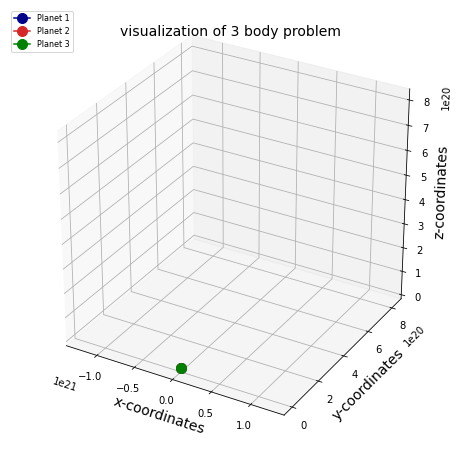

In [61]:
## Plotting
# Animation function
def update_points(i):
    # Updating orbits
    planet1_orbit.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    planet1_orbit.set_3d_properties(r1_sol[:i, 2], 'z')

    planet2_orbit.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    planet2_orbit.set_3d_properties(r2_sol[:i:, 2], 'z')

    planet3_orbit.set_data(r3_sol[:i, 0], r3_sol[:i, 1])
    planet3_orbit.set_3d_properties(r3_sol[:i, 2], 'z')

    # Updating final points (The big circles)
    planet1_final.set_data(r1_sol[i, 0], r1_sol[i, 1])
    planet1_final.set_3d_properties(r1_sol[i, 2], 'z')

    planet2_final.set_data(r2_sol[i, 0], r2_sol[i, 1])
    planet2_final.set_3d_properties(r2_sol[i, 2], 'z')

    planet3_final.set_data(r3_sol[i, 0], r3_sol[i, 1])
    planet3_final.set_3d_properties(r3_sol[i, 2], 'z')


# Create figure
fig = plt.figure(figsize=(8, 8))

# Create 3D axes
ax = fig.add_subplot(111, projection="3d")

# Initial orbits
planet1_orbit, = ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="darkblue")
planet2_orbit, = ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="tab:red")
planet3_orbit, = ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color="green")

# Plot final positions of the planets
planet1_final, = ax.plot(r1_sol[0:1, 0], r1_sol[0:1, 1], r1_sol[0:1, 2], color="darkblue", marker="o", 
                         markersize=10, label="Planet 1")
planet2_final, = ax.plot(r2_sol[0:1, 0], r2_sol[0:1, 1], r2_sol[0:1, 2], color="tab:red", marker="o",
                         markersize=10, label="Planet 2")
planet3_final, = ax.plot(r3_sol[0:1, 0], r3_sol[0:1, 1], r3_sol[0:1, 2], color="green", marker="o", 
                         markersize=10, label="Planet 3")

# Misc. plot details
ax.set_xlabel("x-coordinates", fontsize=14)
ax.set_ylabel("y-coordinates", fontsize=14)
ax.set_zlabel("z-coordinates", fontsize=14)
ax.set_title("visualization of 3 body problem", fontsize=14)
ax.legend(loc="upper left", fontsize=8)

# Create animation
anim = an.FuncAnimation(fig, update_points, frames=n, interval=1, blit = False)

# Export animation
writer = an.FFMpegWriter(fps=30, bitrate=1800)
anim.save('ThreeBodyProblem.mp4', writer=writer)

HTML(anim.to_html5_video())